# LEVEL 4 TASK - RED WINE QUALITY

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

*Input variables (based on physicochemical tests):*

     1 - fixed acidity                 2 - volatile acidity
     3 - citric acid                   4 - residual sugar
     5 - chlorides                     6 - free sulfur dioxide
     7 - total sulfur dioxide          8 - density
     9 - pH                            10 - sulphates
     11 - alcohol
*Output variable (based on sensory data):*

    12 - quality (score between 0 and 10)

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import plotly.express as px

##### Importing and Cleaning Data

In [2]:
df=pd.read_csv("winequality-red.csv")#import csv files into a dataframe

The dataset is free from duplicate values

In [6]:
df.info()#information regarding the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.shape

(1599, 12)

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.head()#first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.describe().T#Summary statistics of numerical columns.

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [11]:
null_values = df.isnull().sum() # Check whether any null values are there in the dataset
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing values in the dataset

#### Distribution of Wine based on Quality

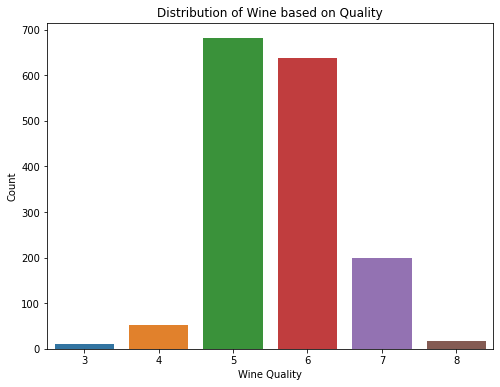

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, order=sorted(df['quality'].unique()))
plt.title('Distribution of Wine based on Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

More number of wines belongs to quality 5 and 6.

In [13]:
df.groupby('quality').mean() # This give the overall mean value of all the input variables based on quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


#### Distribution of Physicochemical Variables based on Wine Quality

In [14]:
input_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
output_variable = 'quality'

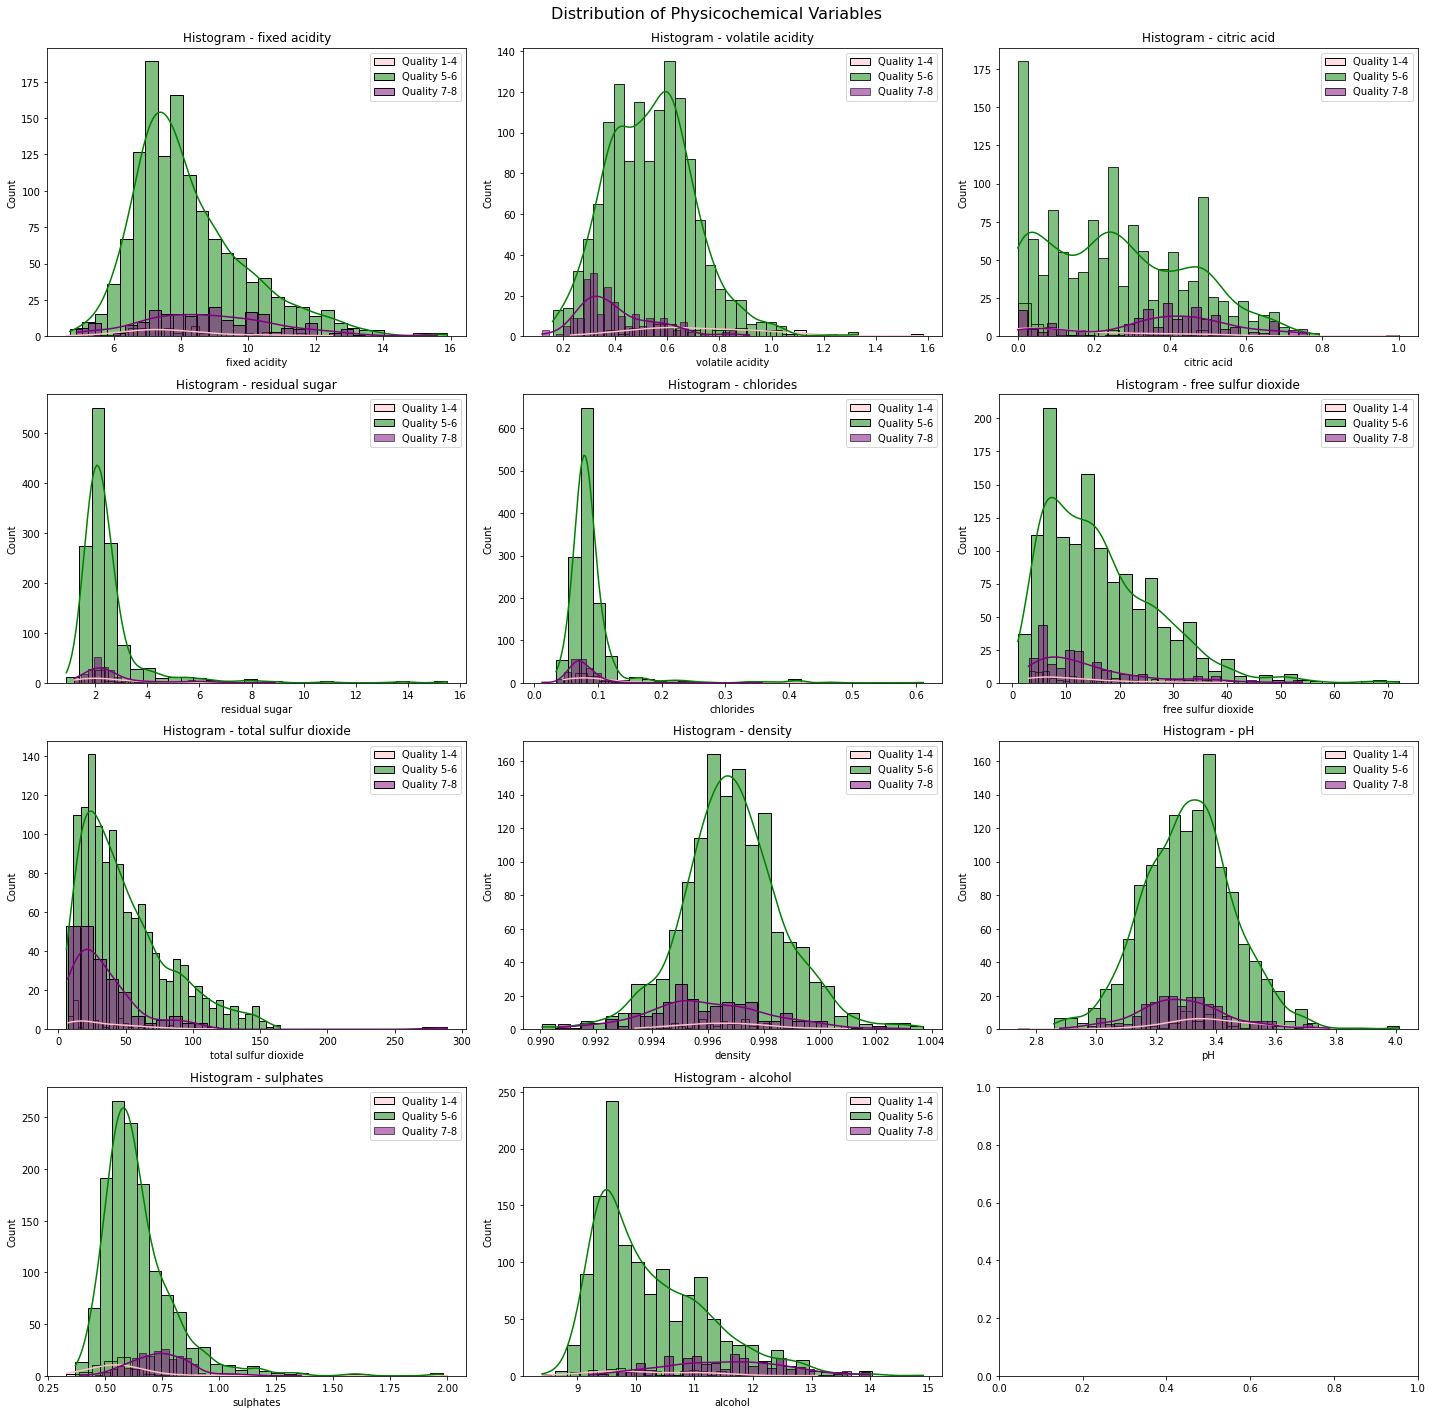

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()
fig.suptitle('Distribution of Physicochemical Variables\n', fontsize=16)

for i, var in enumerate(input_variables):
    sns.histplot(df[df[output_variable] <= 4][var], kde=True, ax=axes[i], color='pink', bins=30, label='Quality 1-4', alpha=0.5)
    sns.histplot(df[(df[output_variable] == 5) | (df[output_variable] == 6)][var], kde=True, ax=axes[i], color='green', bins=30, label='Quality 5-6', alpha=0.5)
    sns.histplot(df[df[output_variable] > 6][var], kde=True, ax=axes[i], color='purple', bins=30, label='Quality 7-8', alpha=0.5)
    axes[i].set_title(f'Histogram - {var}')
    axes[i].legend()

plt.tight_layout()
plt.show()

#### How are the Variables Correlated to each other ? 

In [16]:
correlation_matrix = df.corr() #correlation Matrix
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


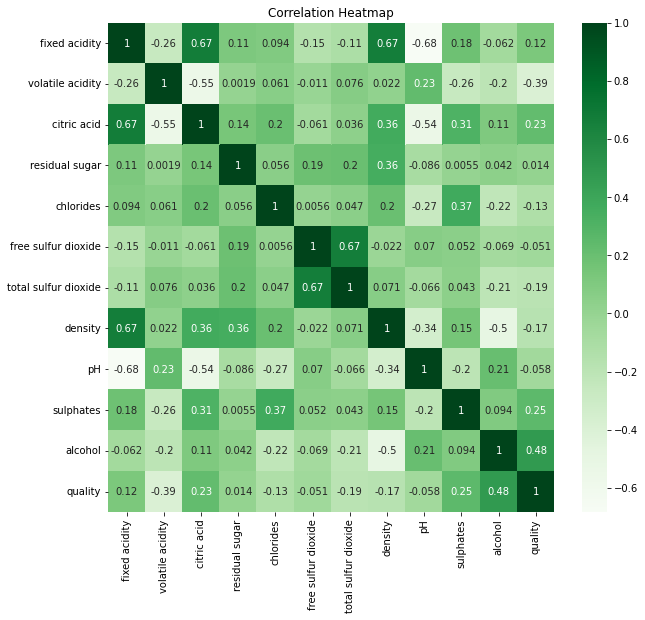

In [17]:
fig, ax = plt.subplots(figsize=(10, 9)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

There is positive correlation between the wine quality and fixed acidity,citric acid,residual sugar,sulphates and alcohol.

There is negative correlation between the wine quality and volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,	density and pH	


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

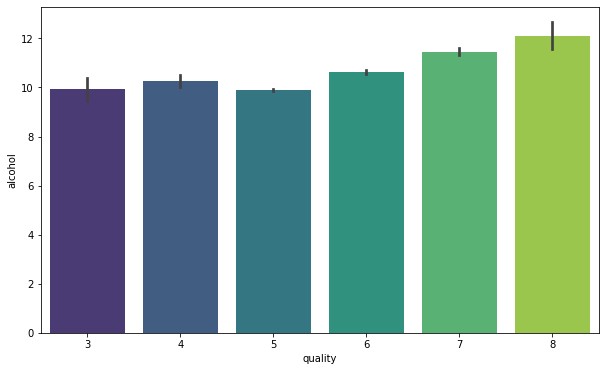

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=df, palette='viridis')

Alcohol content and the wine quality is proportional to each other. As the alcohol content increases the wine quality also increases

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

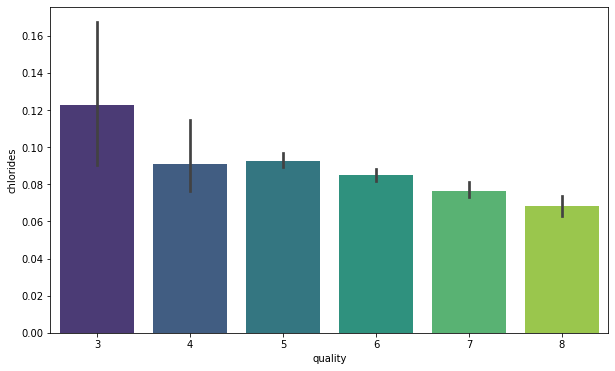

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=df, palette='viridis')

Chlorides content and the wine quality is inversely proportional to each other. As the Chlorides content increases the wine quality also decreases

#### Seperate the wine into good and not good category based on quality

In [20]:
df['quality_class'] = np.where(df['quality'] >= 7, '1', '0')


In [21]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


#### Create Feature Matrix,Target Vector and Split the data  into training and testing set

In [22]:
Feature= df.drop(['quality', 'quality_class'], axis=1)  #Feature Matrix
Target= df['quality_class']   #Target Vector

In [23]:
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.25, random_state=42)

### Model - Linear Regression Model

In [24]:
model=LinearRegression() # Instantiate Linear Regression

In [25]:
model.fit(X_train,y_train)  #fit the model to the dataset

LinearRegression()

In [26]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
training_mae

0.20444992152114913

In [27]:
test_mae = mean_absolute_error(y_test, model.predict(X_test))
test_mae

0.20500229004795537

In [28]:
df_pred_test=pd.DataFrame({"y_test":y_test,"y_pred":model.predict(X_test) })
df_pred_test.head()

,y_test,y_pred
803,0,0.004529
124,0,-0.045829
350,0,0.104899
682,0,0.010764
1326,0,0.157460


Since the training and testing mean absolute error is approximately equal, we can interpret that the model is performing consistently well on both the training and test sets.